In [1]:
import numpy as np
import pandas as pd
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as utils
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#change the dataframe to numpy array to tensor array
def changeToTensor(dataFrame):
    dataFrame= (dataFrame-dataFrame.min())/(dataFrame.max()-dataFrame.min())
    x = dataFrame.values
    x= x.astype('float64')
    x= torch.Tensor(x)
    return x

In [3]:
train_data = pd.read_csv('train.txt',sep=',')
test_data = pd.read_csv('test.txt',sep=',')

In [4]:
train_data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [5]:
### create a model with pytorch#####
class Net(nn.Module):
    def __init__(self,size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(size,1000)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(1000,1)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [6]:
train_numpy = train_data.values
labels = train_numpy[:,-1]
labels= labels.astype('float64')
labels= torch.Tensor(labels)
train_sub = train_data.drop(['date','Occupancy'],axis=1)
x_train = changeToTensor(train_sub)

In [7]:
labels = labels.unsqueeze(1)

In [8]:
x_train.shape, labels.shape

(torch.Size([8143, 5]), torch.Size([8143, 1]))

In [9]:
model = Net(x_train.shape[1])

In [10]:
model

Net(
  (fc1): Linear(in_features=5, out_features=1000, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=1000, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [11]:
criteria= nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [12]:
def train_epoch(model, opt, criterion, batch_size=50):
    model.train()
    losses = []
    for beg_i in range(0, x_train.size(0), batch_size):
        x_batch = x_train[beg_i:beg_i + batch_size, :]
        y_batch = labels[beg_i:beg_i + batch_size, :]
        opt.zero_grad()
        y_hat = model(x_batch)
        loss = criterion(y_hat, y_batch)
        loss.backward()
        opt.step()        
        losses.append(loss.data.numpy())
    return losses

In [13]:
num_epochs = 100
for e in range(num_epochs):
    e_losses = train_epoch(model,optimizer ,criteria,x_train.shape[0])
    print("For epoch ",e+1,"loss is ",e_losses)

For epoch  1 loss is  [array(0.6544039, dtype=float32)]
For epoch  2 loss is  [array(0.6208042, dtype=float32)]
For epoch  3 loss is  [array(0.59221506, dtype=float32)]
For epoch  4 loss is  [array(0.5683771, dtype=float32)]
For epoch  5 loss is  [array(0.548845, dtype=float32)]
For epoch  6 loss is  [array(0.5330599, dtype=float32)]
For epoch  7 loss is  [array(0.52036905, dtype=float32)]
For epoch  8 loss is  [array(0.5100731, dtype=float32)]
For epoch  9 loss is  [array(0.5014838, dtype=float32)]
For epoch  10 loss is  [array(0.49397224, dtype=float32)]
For epoch  11 loss is  [array(0.48702097, dtype=float32)]
For epoch  12 loss is  [array(0.48023036, dtype=float32)]
For epoch  13 loss is  [array(0.47332785, dtype=float32)]
For epoch  14 loss is  [array(0.466157, dtype=float32)]
For epoch  15 loss is  [array(0.45864365, dtype=float32)]
For epoch  16 loss is  [array(0.45078838, dtype=float32)]
For epoch  17 loss is  [array(0.44263998, dtype=float32)]
For epoch  18 loss is  [array(0.4

In [14]:
test_numpy = test_data.values
output1 = test_numpy[:,-1]
output1=output1.astype('float64')
test_sub = test_data.drop(['date','Occupancy'],axis=1)
x_test = changeToTensor(test_sub)

In [15]:
model = model.eval()
with torch.no_grad():
    predictions = model(x_test)

In [16]:
test = np.asarray(predictions)

In [17]:
test[test>0.5]=1
test[test<=0.5]=0

In [18]:
count=0
for i in range(test.shape[0]):
    if(output1[i]==test[i]):
        count = count+1
print("Testing accuracy is ", (count/test.shape[0])*100)

Testing accuracy is  93.53978671041837


In [19]:
### create a model with pytorch#####
class Net_5(nn.Module):
    def __init__(self,size):
        super(Net_5, self).__init__()
        self.fc1 = nn.Linear(size,5)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(5,1)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [20]:
model1 = Net_5(x_train.shape[1])

In [21]:
model1

Net_5(
  (fc1): Linear(in_features=5, out_features=5, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=5, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

Loss across epoch is  [0.6266815798675142, 0.5735864021429201, 0.5738175471381444, 0.5740117686914235, 0.5743453638946138, 0.5742437408828154, 0.5742889829888577, 0.5743204904038731, 0.574344108199201, 0.574362125883742, 0.5743764300898808, 0.5743879192486042, 0.5743973475040459, 0.5744051200951018, 0.574411821801488, 0.5744174019229121, 0.5744221888300849, 0.5744263024591818, 0.5744298542054688, 0.5744330857585116, 0.5744358439271043, 0.5744382993477147, 0.5744403199088283, 0.5744422085401488, 0.574443902366045, 0.5744453970252014, 0.5744467361307726, 0.5744478749792751, 0.5744490249127876, 0.5744499289771405, 0.5744510323899549, 0.5744517380144538, 0.5744524445475602, 0.5744531863346333, 0.5744536515416169, 0.5744541570907686, 0.5744545417951374, 0.5744550915026083, 0.5744556143153005, 0.574455944139783, 0.5744562067273187, 0.5744566036070266, 0.5744567460766653, 0.5744569823145866, 0.5744571474994101, 0.5744574535183791, 0.5744577057477904, 0.5744579225415136, 0.5744580197625044, 0.

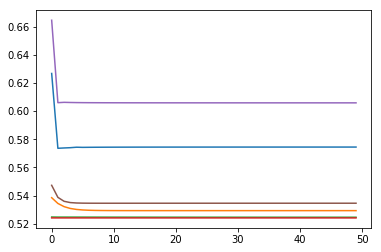

In [22]:
for learning_rate in [0.1,0.01,0.001,0.0001,0.2,0.02]:
    num_epochs = 50
    e_losses=[]
    loss_across_epoch=[]
    optimizer = torch.optim.Adam(model1.parameters(),lr=learning_rate)
    for e in range(num_epochs):
        e_losses = train_epoch(model1,optimizer ,criteria,100)
        loss_to_plot = sum(e_losses)/len(e_losses)
        loss_across_epoch.append(loss_to_plot)
    plt.plot(loss_across_epoch)
    print("Loss across epoch is ",loss_across_epoch," length of epoch is ",len(loss_across_epoch)," for learning rate ",learning_rate)